# <center> Investment Assignment </center>

## Objectives

### Project Brief
You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds __wants to understand the global trends__ in investments so that she can take the investment decisions effectively.

 

###  Business and Data Understanding
Spark Funds has two minor constraints for investments:

1. **It wants to invest between 5 to 15 million USD per round of investment**

2. **It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in**

For your analysis, consider a country to be English speaking only if English is one of the official languages in that country

You may use this list: Click <a href="https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language">here</a> for a list of countries where English is an official language.

 

These conditions will give you sufficient information for your initial analysis. Before getting to specific questions, let’s understand the problem and the data first.

 

**1. What is the strategy?**

Spark Funds **wants to invest where most other investors are investing.** `This pattern is often observed among early stage startup investors.`

 

**2. Where did we get the data from?**

We have taken real investment data from crunchbase.com, so the insights you get may be incredibly useful. For this assignment, we have divided the data into the following files:

 

You have to use three main data tables for the entire analysis (available for download on the next page):

 

**3. What is Spark Funds’ business objective?**

The business objectives and goals of data analysis are pretty straightforward.

**1. Business objective:** The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.<br>
**2. Goals of data analysis:** Your goals are divided into three sub-goals:
- __Investment type analysis:__ Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.
- __Country analysis:__ Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.
- __Sector analysis:__ Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.)

# Data sets

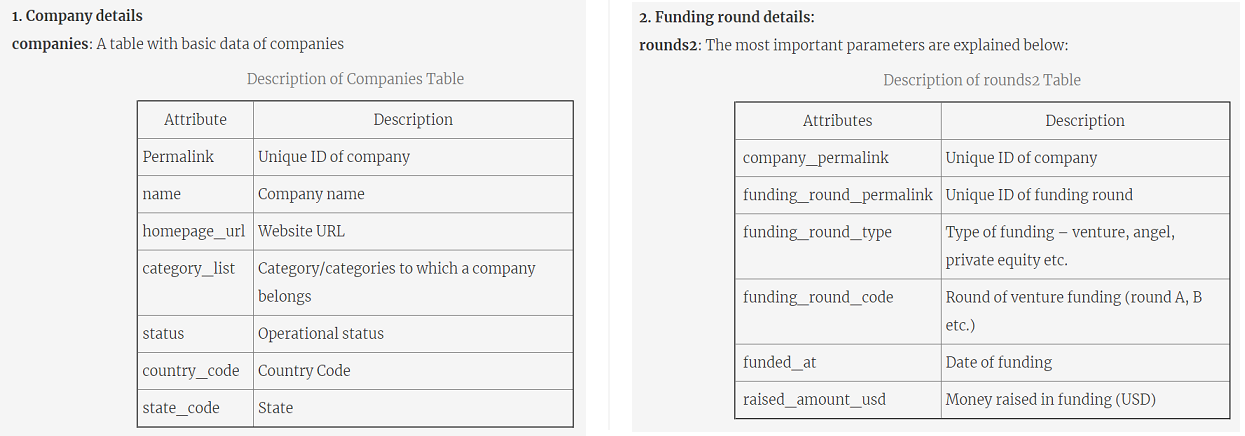

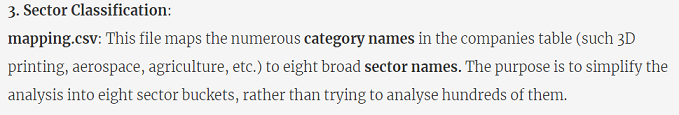

<br><br><br>
# Checkpoint 1: Data Cleaning 1


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
companies = pd.read_csv("companies.csv", encoding = 'latin1')
rounds2 = pd.read_csv("rounds2.csv", encoding='latin1')

<br><br>**1. How many unique companies are present in rounds2?**

In [3]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
# From the details of the dataset cmopany_permalink are the unique ids of the companies.
# So, we need to count all those using pivote table. we can take any col as values to count
rd_uniq = pd.pivot_table(rounds2 , index='company_permalink' , values='funding_round_permalink' , aggfunc='count')
rd_uniq.shape
# The index are the unique companies.

(90247, 1)

<br><br>**2. How many unique companies are present in the companies file?**

In [5]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
# Creating a pivote table same as before.
# Here permalink is the company unique id
com_uniq = pd.pivot_table(companies , index='permalink' , values='status' , aggfunc='count')
com_uniq.shape

(66368, 1)

<br><br>**4. Are there any companies in the rounds2 file which are not present in companies ? Answer Y/N.**

In [7]:
# Use the previous 2 variables rd_uniq and com_uniq for finding the companies
# convert the index vallues to sets
# perform intersection operation 
# [if output < cols in compaines]  == Yes
# [if output = cols in compaines]  == No
rd_uniq.reset_index(inplace=True)
com_uniq.reset_index(inplace=True)

rd_set = set(rd_uniq.company_permalink.apply(lambda x: x.lower()))
com_set = set(com_uniq.permalink.apply(lambda x: x.lower()))
print(len(rd_set & com_set))

66363


--There are some companies in rounds2-df that are not present in companies-df<br>
 **Ans: Yes**

<br><br>**5. Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?**

In [8]:
# For this we need to use merge() method and then compare the shape of the new df with old
# For using the merge method we need to have same colums name in both the dataframes
# So we need to change the col name company_permalink in rounds2 to permalink
## And also the case of the values--- change all values to the lower case
rounds2.rename(columns={'company_permalink':'permalink'}, inplace=True)

In [9]:
# NOw we have changed the col name of the rounds2 
# we need to convert all the values in the rounds and the companies to their lower case to merge them into one df
companies.permalink = companies.permalink.apply(lambda x: x.lower())
rounds2.permalink = rounds2.permalink.apply(lambda x: x.lower())

In [10]:
# Create a variable named master_frame and assign it with the pivote table
# We use the 'outer' because we need all companies in companies-df into rounds2..so the rounds size increases
master_frame= pd.merge(rounds2, companies, how='inner', on='permalink')
master_frame.shape

(114942, 15)

In [11]:
print(companies.shape, rounds2.shape)

(66368, 10) (114949, 6)


## Handiling the Missing data

In [12]:
len(master_frame.columns)

15

In [13]:
(master_frame.isnull().sum()/len(master_frame.index))*100

permalink                   0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.908945
funded_at                   0.000000
raised_amount_usd          17.386160
name                        0.000870
homepage_url                5.334865
category_list               2.964104
status                      0.000000
country_code                7.543805
state_code                  9.516974
region                      8.839241
city                        8.836631
founded_at                 17.852482
dtype: float64

**Here we can remove somr columns since they does not make importance to the data we require. They are funding_round_code, funded_at , homepage_url, state_code , region  , city .**

In [14]:
master_frame = master_frame.drop(['funding_round_code', 'funded_at' , 'homepage_url', 'state_code' , 'region' , 'city'], axis=1)
master_frame.head()
print(master_frame.shape)

(114942, 9)


In [15]:
(master_frame.isnull().sum()/len(master_frame.index))*100

permalink                   0.000000
funding_round_permalink     0.000000
funding_round_type          0.000000
raised_amount_usd          17.386160
name                        0.000870
category_list               2.964104
status                      0.000000
country_code                7.543805
founded_at                 17.852482
dtype: float64

In [16]:
master_frame = master_frame.dropna(subset=['raised_amount_usd', 'country_code','category_list'])

In [17]:
master_frame.shape

(88529, 9)

In [18]:
master_frame.isnull().sum()

permalink                      0
funding_round_permalink        0
funding_round_type             0
raised_amount_usd              0
name                           1
category_list                  0
status                         0
country_code                   0
founded_at                 13369
dtype: int64

<br><br>

# Checkpoint 2: Funding Type Analysis
###  > From now we need to work ony with the "master_frame"

__Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.__

1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1
  > **Most representative value will be the median of each funding types.**

2. Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

In [19]:
master_frame.shape

(88529, 9)

In [20]:
# Considering the fist costraint: We need to find the mean of each investment type
# Create a pivot table to form a table using funding type...'funding_round_type' is the col

represent_value = pd.pivot_table(master_frame, index='funding_round_type' , values= 'raised_amount_usd', aggfunc='median' )

represent_value.loc[['venture', 'angel', 'seed','private_equity']].sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
funding_round_type,
private_equity,20000000.0
venture,5000000.0
angel,414906.0
seed,300000.0


**Since the value of the private equity is too high for the Spark Funds since it is out of the range of the investment amount, we neglect it and go for the next one (Venture).**

<br><br>
# Checkpoint 3: Country Analysis

Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.


1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [21]:
type_country = pd.pivot_table(master_frame, index=['funding_round_type','country_code'] ,  values='raised_amount_usd', aggfunc='sum')

ven_countries = type_country.loc[['venture']].sort_values(by='raised_amount_usd', ascending=False)

top9 = ven_countries.head(9)
top9

raised_amount_usd
funding_round_type country_code                   
venture            USA                4.200680e+11
                   CHN                3.933892e+10
                   GBR                2.007281e+10
                   IND                1.426151e+10
                   CAN                9.482218e+09
                   FRA                7.226851e+09
                   ISR                6.854350e+09
                   DEU                6.306922e+09
                   JPN                3.167647e+09

## Identify the top three English-speaking countries in the data frame top9.

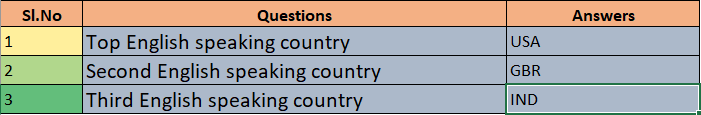

<br><br><br>
# Checkpoint 4: Sector Analysis 1

In [22]:
import pandas as pd
maping = pd.read_csv('mapping.csv')
maping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [23]:
master_frame.category_list = master_frame.category_list.astype('str')

In [24]:
master_frame.category_list = master_frame.category_list.apply(lambda x: x.split("|")[0] )

In [25]:
master_frame.rename(columns={'category_list':'primary_sector'}, inplace=True)
master_frame

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,primary_sector,status,country_code,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.0,:Qounter,Application Platforms,operating,USA,04-09-2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.0,0-6.com,Curated Web,operating,CHN,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,41250.0,01Games Technology,Games,operating,HKG,NaN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,43360.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,01-01-1997
...,...,...,...,...,...,...,...,...,...
114935,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,7000.0,Zzzzapp Wireless ltd.,Advertising,operating,HRV,13-05-2012
114936,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,33149.0,Zzzzapp Wireless ltd.,Advertising,operating,HRV,13-05-2012
114937,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,41313.0,Zzzzapp Wireless ltd.,Advertising,operating,HRV,13-05-2012
114938,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,32842.0,Zzzzapp Wireless ltd.,Advertising,operating,HRV,13-05-2012


In [26]:
melt = pd.melt(maping, id_vars='category_list', value_vars=['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])

melt = melt[melt.value == 1]

melt.rename(columns={'category_list':'primary_sector', 'variable':'main_sector'}, inplace=True)
# pd.pivot_table(melt, index=['variable','category_list'])
melt.drop(columns='value', inplace=True)
melt

,primary_sector,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [27]:
master_frame.shape

(88529, 9)

In [28]:
master_frame = pd.merge(master_frame, melt, how='inner', on='primary_sector')
master_frame
# Master_frame merged with mapping

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,primary_sector,status,country_code,founded_at,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,NaN,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,90min,Media,operating,GBR,01-01-2011,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,90min,Media,operating,GBR,01-01-2011,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,18000000.0,90min,Media,operating,GBR,01-01-2011,Entertainment
4,/organization/a-dance-for-me,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,1090000.0,A Dance for Me,Media,operating,USA,31-07-2011,Entertainment
...,...,...,...,...,...,...,...,...,...,...
82123,/organization/wing-ma-am,/funding-round/13d72bd46f529ee00ff699254d9d1c16,seed,25000.0,Wing Ma'am,Gay & Lesbian,operating,USA,07-10-2012,Others
82124,/organization/wiselike,/funding-round/e313727defb87ca1dcb8ec9f6d091e47,seed,1250000.0,Wiselike,Q&A,operating,USA,NaN,"News, Search and Messaging"
82125,/organization/yes-no,/funding-round/e51932c2afebd10c5e8c08b94b57bcb7,seed,1000000.0,yes.no,Q&A,closed,ISR,01-01-2015,"News, Search and Messaging"
82126,/organization/youcruit,/funding-round/31fe44e42294821ad500ab67cb62e8c3,angel,447037.0,Youcruit,Micro-Enterprises,operating,SWE,01-01-2012,Others


In [29]:
master_frame.shape

(82128, 10)

<br><br><br><br>
# Checkpoint 5: Sector Analysis 2

<br><br>

In [30]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
master_frame = master_frame[~(master_frame.raised_amount_usd<1)]
master_frame

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,primary_sector,status,country_code,founded_at,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,NaN,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,90min,Media,operating,GBR,01-01-2011,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,90min,Media,operating,GBR,01-01-2011,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,18000000.0,90min,Media,operating,GBR,01-01-2011,Entertainment
4,/organization/a-dance-for-me,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,1090000.0,A Dance for Me,Media,operating,USA,31-07-2011,Entertainment
...,...,...,...,...,...,...,...,...,...,...
82123,/organization/wing-ma-am,/funding-round/13d72bd46f529ee00ff699254d9d1c16,seed,25000.0,Wing Ma'am,Gay & Lesbian,operating,USA,07-10-2012,Others
82124,/organization/wiselike,/funding-round/e313727defb87ca1dcb8ec9f6d091e47,seed,1250000.0,Wiselike,Q&A,operating,USA,NaN,"News, Search and Messaging"
82125,/organization/yes-no,/funding-round/e51932c2afebd10c5e8c08b94b57bcb7,seed,1000000.0,yes.no,Q&A,closed,ISR,01-01-2015,"News, Search and Messaging"
82126,/organization/youcruit,/funding-round/31fe44e42294821ad500ab67cb62e8c3,angel,447037.0,Youcruit,Micro-Enterprises,operating,SWE,01-01-2012,Others


In [32]:
# DF with only companies from USA
D1 = master_frame[master_frame.country_code == 'USA']
D1.shape

(56915, 10)

In [33]:
# Create a pivot table and merge it with the actual table on main_sector variable
# This pivot table is used for counting and summing of the total noof investments in a perticulat sector
d1_merge = pd.pivot_table(D1, index='main_sector', values = 'raised_amount_usd', aggfunc=['count','sum'])
d1_merge.reset_index(inplace=True)
d1_merge.columns=['main_sector','count', 'sum']
d1_merge

,main_sector,count,sum
0,Automotive & Sports,1087,1.892177e+10
1,Cleantech / Semiconductors,11421,1.697839e+11
2,Entertainment,3525,2.828393e+10
3,Health,5351,5.083625e+10
4,Manufacturing,4036,6.984102e+10
5,"News, Search and Messaging",7986,7.297069e+10
6,Others,13706,1.264510e+11
7,"Social, Finance, Analytics, Advertising",9803,8.601354e+10


In [34]:
D1 = pd.merge(D1, d1_merge, how='inner', on='main_sector')
D1.shape

(56915, 12)

In [35]:
# DF with only companies from IND
D2 = master_frame[master_frame.country_code == 'IND']
D2.shape

(1498, 10)

In [36]:
# Create a pivot table and merge it with the actual table on main_sector variable
# This pivot table is used for counting and summing of the total noof investments in a perticulat sector
d2_merge = pd.pivot_table(D2, index='main_sector', values = 'raised_amount_usd', aggfunc=['count','sum'])
d2_merge.reset_index(inplace=True)
d2_merge.columns=['main_sector','count', 'sum']
d2_merge

,main_sector,count,sum
0,Automotive & Sports,60,1.678812e+09
1,Cleantech / Semiconductors,93,3.330406e+09
2,Entertainment,150,1.424280e+09
3,Health,83,6.608588e+08
4,Manufacturing,95,1.058886e+09
5,"News, Search and Messaging",275,3.295819e+09
6,Others,526,1.031486e+10
7,"Social, Finance, Analytics, Advertising",216,4.566158e+09


In [37]:
D2 = pd.merge(D2, d2_merge, how='inner', on='main_sector')
D2.head()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,primary_sector,status,country_code,founded_at,main_sector,count,sum
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,NaN,Entertainment,150,1.424280e+09
1,/organization/manas-informatics,/funding-round/719e50301803d3918ffa558fc877e41c,venture,160000.0,Manas Informatic,Media,operating,IND,05-05-2007,Entertainment,150,1.424280e+09
2,/organization/crispy-games-private-limited,/funding-round/1cfde8b86d777fe401eed35e0531c8e4,seed,40000.0,Crispy Games Private Limited,Games,operating,IND,01-01-2011,Entertainment,150,1.424280e+09
3,/organization/dhruva,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,5000000.0,Dhruva,Games,operating,IND,01-01-1997,Entertainment,150,1.424280e+09
4,/organization/fictiontree,/funding-round/22de2c581da09f4efd98b2eb698feab1,undisclosed,10000.0,Fictiontree,Games,operating,IND,08-06-2014,Entertainment,150,1.424280e+09


In [38]:
# DF with only companies from GBR
D3 = master_frame[master_frame.country_code == 'GBR']
D3.shape

(4598, 10)

In [39]:
# Create a pivot table and merge it with the actual table on main_sector variable
# This pivot table is used for counting and summing of the total noof investments in a perticulat sector
d3_merge = pd.pivot_table(D3, index='main_sector', values = 'raised_amount_usd', aggfunc=['count','sum'])
d3_merge.reset_index(inplace=True)
d3_merge.columns=['main_sector','count', 'sum']
d3_merge

,main_sector,count,sum
0,Automotive & Sports,121,5.806745e+08
1,Cleantech / Semiconductors,677,7.665880e+09
2,Entertainment,423,1.765772e+09
3,Health,253,1.809921e+09
4,Manufacturing,290,1.616510e+09
5,"News, Search and Messaging",733,4.958121e+09
6,Others,1143,7.706658e+09
7,"Social, Finance, Analytics, Advertising",958,3.879432e+09


In [40]:
D3 = pd.merge(D3, d3_merge, how='inner', on='main_sector')
D3.head()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,primary_sector,status,country_code,founded_at,main_sector,count,sum
0,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,90min,Media,operating,GBR,01-01-2011,Entertainment,423,1.765772e+09
1,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,90min,Media,operating,GBR,01-01-2011,Entertainment,423,1.765772e+09
2,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,18000000.0,90min,Media,operating,GBR,01-01-2011,Entertainment,423,1.765772e+09
3,/organization/bundll,/funding-round/f6add367ab93afbf0a4bef81761dc06a,seed,750000.0,Bundll,Media,operating,GBR,NaN,Entertainment,423,1.765772e+09
4,/organization/campaign,/funding-round/259e163cb2b3fc5d407da16be91c3e6e,debt_financing,500000.0,Campaign,Media,operating,GBR,NaN,Entertainment,423,1.765772e+09


## Table 5.1

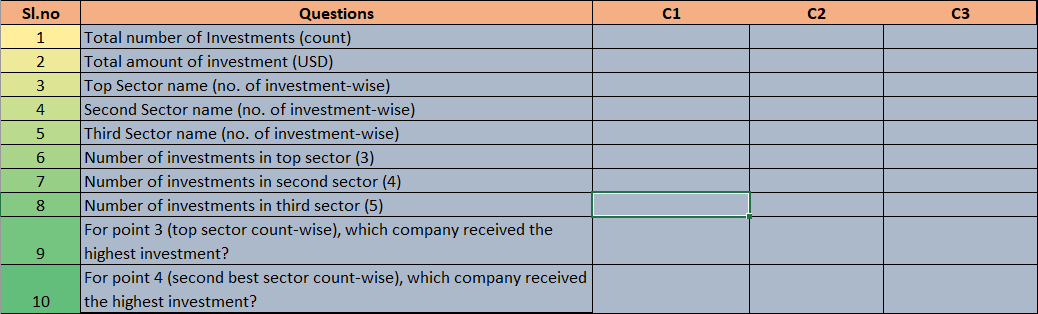

In [41]:
# 1. no of investments , 2. Amount of investment
print(f'D1 = { D1.raised_amount_usd.count()}, {D1.raised_amount_usd.sum()}')
print(f'D2 = { D2.raised_amount_usd.count()}, {D2.raised_amount_usd.sum()}')
print(f'D3 = { D3.raised_amount_usd.count()}, {D3.raised_amount_usd.sum()}')

D1 = 56915, 623102069851.0
D2 = 1498, 26330076077.0
D3 = 4598, 29982967015.0


In [42]:
# Top sectors based on no of investments
# this can be calculated from the d1_merge table
d1_merge.sort_values(by='count', ascending=False)

,main_sector,count,sum
6,Others,13706,1.264510e+11
1,Cleantech / Semiconductors,11421,1.697839e+11
7,"Social, Finance, Analytics, Advertising",9803,8.601354e+10
5,"News, Search and Messaging",7986,7.297069e+10
3,Health,5351,5.083625e+10
4,Manufacturing,4036,6.984102e+10
2,Entertainment,3525,2.828393e+10
0,Automotive & Sports,1087,1.892177e+10


In [43]:
d2_merge.sort_values(by='count', ascending=False)

,main_sector,count,sum
6,Others,526,1.031486e+10
5,"News, Search and Messaging",275,3.295819e+09
7,"Social, Finance, Analytics, Advertising",216,4.566158e+09
2,Entertainment,150,1.424280e+09
4,Manufacturing,95,1.058886e+09
1,Cleantech / Semiconductors,93,3.330406e+09
3,Health,83,6.608588e+08
0,Automotive & Sports,60,1.678812e+09


In [44]:
d3_merge.sort_values(by='count', ascending=False)

,main_sector,count,sum
6,Others,1143,7.706658e+09
7,"Social, Finance, Analytics, Advertising",958,3.879432e+09
5,"News, Search and Messaging",733,4.958121e+09
1,Cleantech / Semiconductors,677,7.665880e+09
2,Entertainment,423,1.765772e+09
4,Manufacturing,290,1.616510e+09
3,Health,253,1.809921e+09
0,Automotive & Sports,121,5.806745e+08


In [45]:
top_comp_name_d1 = D1[D1.main_sector == 'Others' ]
pd.pivot_table(top_comp_name_d1, index=['main_sector','name'], values='raised_amount_usd', aggfunc='sum').sort_values(by='raised_amount_usd', ascending=False)

raised_amount_usd
main_sector name                                          
Others      Facebook                          2.425700e+09
            Zebra Technologies                2.000000e+09
            Quad/Graphics                     1.900000e+09
            SoFi                              1.766200e+09
            Venari Resources                  1.498515e+09
...                                                    ...
            Infinity Home Investments         6.000000e+02
            Bella Professional Services       5.000000e+02
            Cmilligan Investments             3.000000e+02
            SkyTechnica Framework             2.320000e+02
            Snapstream                        5.000000e+01

[7482 rows x 1 columns]

In [46]:
sec_comp_name_d1 = D1[D1.main_sector == 'Cleantech / Semiconductors']
pd.pivot_table(sec_comp_name_d1, index=['main_sector','name'], values='raised_amount_usd', aggfunc='sum').sort_values(by='raised_amount_usd', ascending=False)

raised_amount_usd
main_sector                name                                           
Cleantech / Semiconductors Freescale Semiconductor            1.760000e+10
                           Carestream                         2.400000e+09
                           Terra-Gen Power                    1.200000e+09
                           Cape Wind                          1.200000e+09
                           Juno Therapeutics                  1.159803e+09
...                                                                    ...
                           Bradshaw Propulsion                3.000000e+03
                           Gigawatt Farms                     3.000000e+03
                           Canfield Medical Supply            2.750000e+03
                           Uranium Recovery Corporation       2.000000e+03
                           PROTEIN LOUNGE                     1.000000e+03

[4741 rows x 1 columns]

In [47]:
top_comp_name_d2 = D2[D2.main_sector == 'Others']
pd.pivot_table(top_comp_name_d2, index=['main_sector','name'], values='raised_amount_usd', aggfunc='sum').sort_values(by='raised_amount_usd', ascending=False)

raised_amount_usd
main_sector name                                                                 
Others      Flipkart                                                 3.151140e+09
            Snapdeal                                                 1.897700e+09
            Paytm                                                    7.000000e+08
            Piramal Realty                                           4.340000e+08
            Tata Teleservices                                        2.120000e+08
...                                                                           ...
            Sky Level Enterprieses                                   5.000000e+03
            barter.li                                                2.500000e+03
            regrob.com                                               2.000000e+03
            BookingArena.com                                         1.883000e+03
            koshimbir.com - an online and in-store marketpl...       1.669000e+03

[369 rows x 1 columns]

In [48]:
sec_comp_name_d2 = D2[D2.main_sector == 'News, Search and Messaging']
pd.pivot_table(sec_comp_name_d2, index=['main_sector','name'], values='raised_amount_usd', aggfunc='sum').sort_values(by='raised_amount_usd', ascending=False)

raised_amount_usd
main_sector                name                                                             
News, Search and Messaging One97 Communications                                  585000000.0
                           ACT (Atria Convergence Technologies Pvt. Ltd.)        500000000.0
                           Quikr                                                 346000000.0
                           Tower Vision                                          300000000.0
                           FreeCharge                                            113000000.0
...                                                                                      ...
                           Adhysteria                                                10000.0
                           MobileVeda                                                 9000.0
                           Blue Box Media Private Limited                             8217.0
                           Techieweb Solutions                                        5000.0
                           RuralServer                                                 569.0

[195 rows x 1 columns]

In [49]:
top_comp_name_d3 = D3[D3.main_sector == 'Others']
pd.pivot_table(top_comp_name_d3, index=['main_sector','name'], values='raised_amount_usd', aggfunc='sum').sort_values(by='raised_amount_usd', ascending=False)

raised_amount_usd
main_sector name                                               
Others      Helios Towers Africa                    630000000.0
            G4S                                     541000000.0
            OneWeb                                  500000000.0
            University of Ulster                    477475356.0
            Seven Energy                            255000000.0
...                                                         ...
            WestBridge                                  13000.0
            Communication Specialist Limited            10500.0
            Enterprise Data Safe Ltd.                    9542.0
            Naturebytes                                  9370.0
            Posh Eyes                                    3620.0

[732 rows x 1 columns]

In [50]:
sec_comp_name_d3 = D3[D3.main_sector == 'Social, Finance, Analytics, Advertising']
pd.pivot_table(sec_comp_name_d3, index=['main_sector','name'], values='raised_amount_usd', aggfunc='sum').sort_values(by='raised_amount_usd', ascending=False)

raised_amount_usd
main_sector                             name                                 
Social, Finance, Analytics, Advertising Powa Technologies         176700000.0
                                        WorldRemit                147655000.0
                                        Wonga                     145393366.0
                                        Shire Leasing             129104098.0
                                        Mereo                     119000000.0
...                                                                       ...
                                        WARSTUFF                       3600.0
                                        Maplace.co                     1553.0
                                        twenty5media                   1506.0
                                        Saunders Solutions              100.0
                                        BeMySpot LTD                    100.0

[566 rows x 1 columns]

<br><br><br><br>

# Checkpoint 6: Plots

1. A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [51]:
# A plot showing total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type.
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,primary_sector,status,country_code,founded_at,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.0,#fame,Media,operating,IND,NaN,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,15000000.0,90min,Media,operating,GBR,01-01-2011,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,5800000.0,90min,Media,operating,GBR,01-01-2011,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,18000000.0,90min,Media,operating,GBR,01-01-2011,Entertainment
4,/organization/a-dance-for-me,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,1090000.0,A Dance for Me,Media,operating,USA,31-07-2011,Entertainment


In [52]:
# import seaborn as sns
# import matplotlib.pyplot as plt
plot_1 = master_frame[master_frame.funding_round_type.isin(['venture', 'angel','seed', 'private_equity'])]
plot_1.shape

(69509, 10)

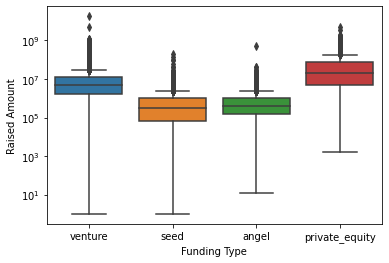

In [53]:
sns.boxplot(data=plot_1, x='funding_round_type', y='raised_amount_usd')
plt.xlabel("Funding Type")
plt.ylabel("Raised Amount")
plt.yscale('log')
plt.show()

In [54]:
tmp2 = master_frame[master_frame.funding_round_type == 'venture']
tmp2 = pd.pivot_table(tmp2, index='country_code' , values= 'raised_amount_usd', aggfunc='sum')
tmp2 = tmp2.sort_values(by='raised_amount_usd', ascending=False).head(9).reset_index()
tmp2

,country_code,raised_amount_usd
0,USA,3.922376e+11
1,CHN,3.703144e+10
2,GBR,1.892439e+10
3,IND,1.353798e+10
4,CAN,8.715621e+09
5,FRA,7.033840e+09
6,ISR,6.520700e+09
7,DEU,5.751654e+09
8,SWE,3.029608e+09


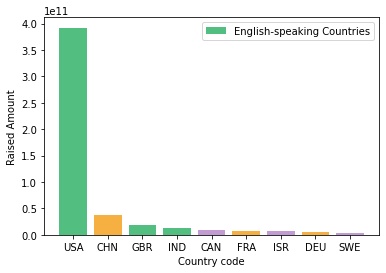

In [55]:
plt.bar(data=tmp2, x='country_code' , height='raised_amount_usd',color=["#52BE80","#F5B041","#52BE80","#52BE80","#C39BD3","#F5B041","#C39BD3","#F5B041","#C39BD3" ], label="English-speaking Countries" )
plt.legend()
plt.xlabel("Country code")
plt.ylabel("Raised Amount")
plt.show()

In [56]:
# The other way for PLot3 New concept "subplots"

tmp1 = master_frame[master_frame.funding_round_type == 'venture']
usa = tmp1[(tmp1.country_code == 'USA') & (tmp1.main_sector.isin(['Others','Cleantech / Semiconductors'
                                                              ,'Social, Finance, Analytics, Advertising']))]
gbr = tmp1[(tmp1.country_code == 'GBR') & (tmp1.main_sector.isin(['Others','News, Search and Messaging',
                                                               'Social, Finance, Analytics, Advertising']))]
ind= tmp1[(tmp1.country_code == 'IND') & (tmp1.main_sector.isin(['Others','News, Search and Messaging'
                                                              ,'Social, Finance, Analytics, Advertising']))]

In [57]:
usa3= pd.pivot_table(usa, index='country_code', columns='main_sector', values='raised_amount_usd', aggfunc='count')
ind3 = pd.pivot_table(ind, index='country_code', columns='main_sector', values='raised_amount_usd', aggfunc='count')
gbr3 = pd.pivot_table(gbr, index='country_code', columns='main_sector', values='raised_amount_usd', aggfunc='count')
tmp2 = pd.concat([usa3,ind3,gbr3])
tmp2

,Cleantech / Semiconductors,Others,"Social, Finance, Analytics, Advertising","News, Search and Messaging"
country_code,,,,
USA,7847.0,8239,5153,NaN
IND,NaN,280,77,130.0
GBR,NaN,507,317,241.0


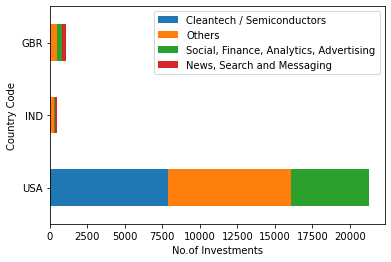

In [58]:
# plt.figure(figsize=(15.0,7.0))
tmp2.plot.barh(stacked=True)
plt.xlabel("No.of Investments")
plt.ylabel("Country Code")
plt.show()

In [59]:
usa2 = pd.pivot_table(usa, index=['country_code','main_sector'], values = 'raised_amount_usd', aggfunc='count')
ind2 = pd.pivot_table(ind, index=['country_code','main_sector'], values = 'raised_amount_usd', aggfunc='count')
gbr2 = pd.pivot_table(gbr, index=['country_code','main_sector'], values = 'raised_amount_usd', aggfunc='count')

tmp = pd.concat([usa2,ind2,gbr2], axis=0)
tmp = tmp.reset_index()
tmp

,country_code,main_sector,raised_amount_usd
0,USA,Cleantech / Semiconductors,7847
1,USA,Others,8239
2,USA,"Social, Finance, Analytics, Advertising",5153
3,IND,"News, Search and Messaging",130
4,IND,Others,280
5,IND,"Social, Finance, Analytics, Advertising",77
6,GBR,"News, Search and Messaging",241
7,GBR,Others,507
8,GBR,"Social, Finance, Analytics, Advertising",317


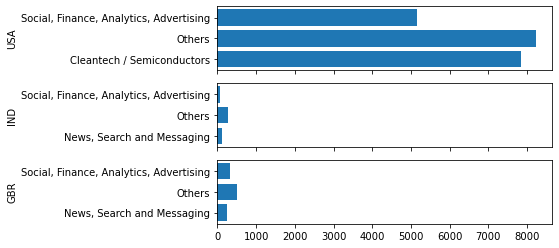

In [60]:
# from matplotlib import pyplot as plt

fig,(ax1,ax2,ax3) = plt.subplots(nrows=3,ncols=1 , sharex=True)
# print(ax1,ax2)
ax1.barh(data=tmp, y=tmp.main_sector.loc[:2], width=tmp.raised_amount_usd.loc[:2])
ax2.barh(data=tmp, y=tmp.main_sector.loc[3:5], width=tmp.raised_amount_usd.loc[3:5])
ax3.barh(data=tmp, y=tmp.main_sector.loc[6:], width=tmp.raised_amount_usd.loc[6:])

ax1.set_ylabel('USA')
ax2.set_ylabel('IND')
ax3.set_ylabel('GBR')
# ax1.legend()
plt.show()